# chi_square.ipynb
# WESmith 12/05/22
## experiment with creating chi-square random variables

In [322]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

## ANALYTICAL CHI-SQUARE DISTRIBUTION

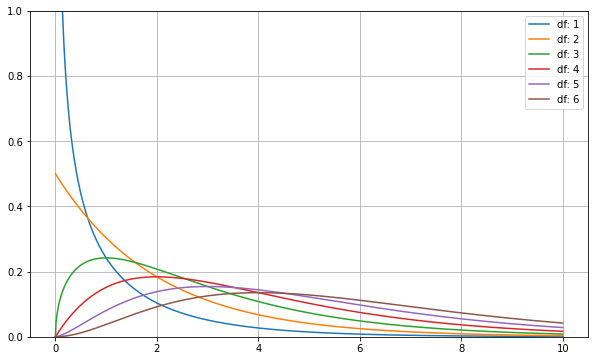

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.linspace(0,10, 1000)
for df in [1, 2, 3, 4, 5, 6]:
    ax.plot(x, chi2.pdf(x, df), label='df: {}'.format(df))
ax.set_ylim(0.0, 1.0)
ax.grid()
ax.legend()
plt.show()

## MONTE CARLO GENERATION OF THE CHI-SQUARE DISTRIBUTION COMPARED TO THE ANALYTICAL DISTRIBUTION

### CAUTION: THERE MAY BE AN INCONSISTENCY IN PLT.HIST()'S DENSITY=TRUE OPTION: IT GAVE INCONSISTENT RESULTS FOR ONE DISTRIBUTION THAT WAS PLOTTED IN THIS NOTEBOOK (THAT IS NO LONGER RELEVANT HERE)
### IT IS WORKING FINE FOR THE EXAMPLES IN THIS NOTEBOOK AT PRESENT: THE CHECKS ON INTEGRAL OF PDF IS 1.0
### SEE 12/07/22 ENOTES EARLY AM: LINKS TO GITHUB TICKETS ON THIS THAT HAVE BEEN CLOSED

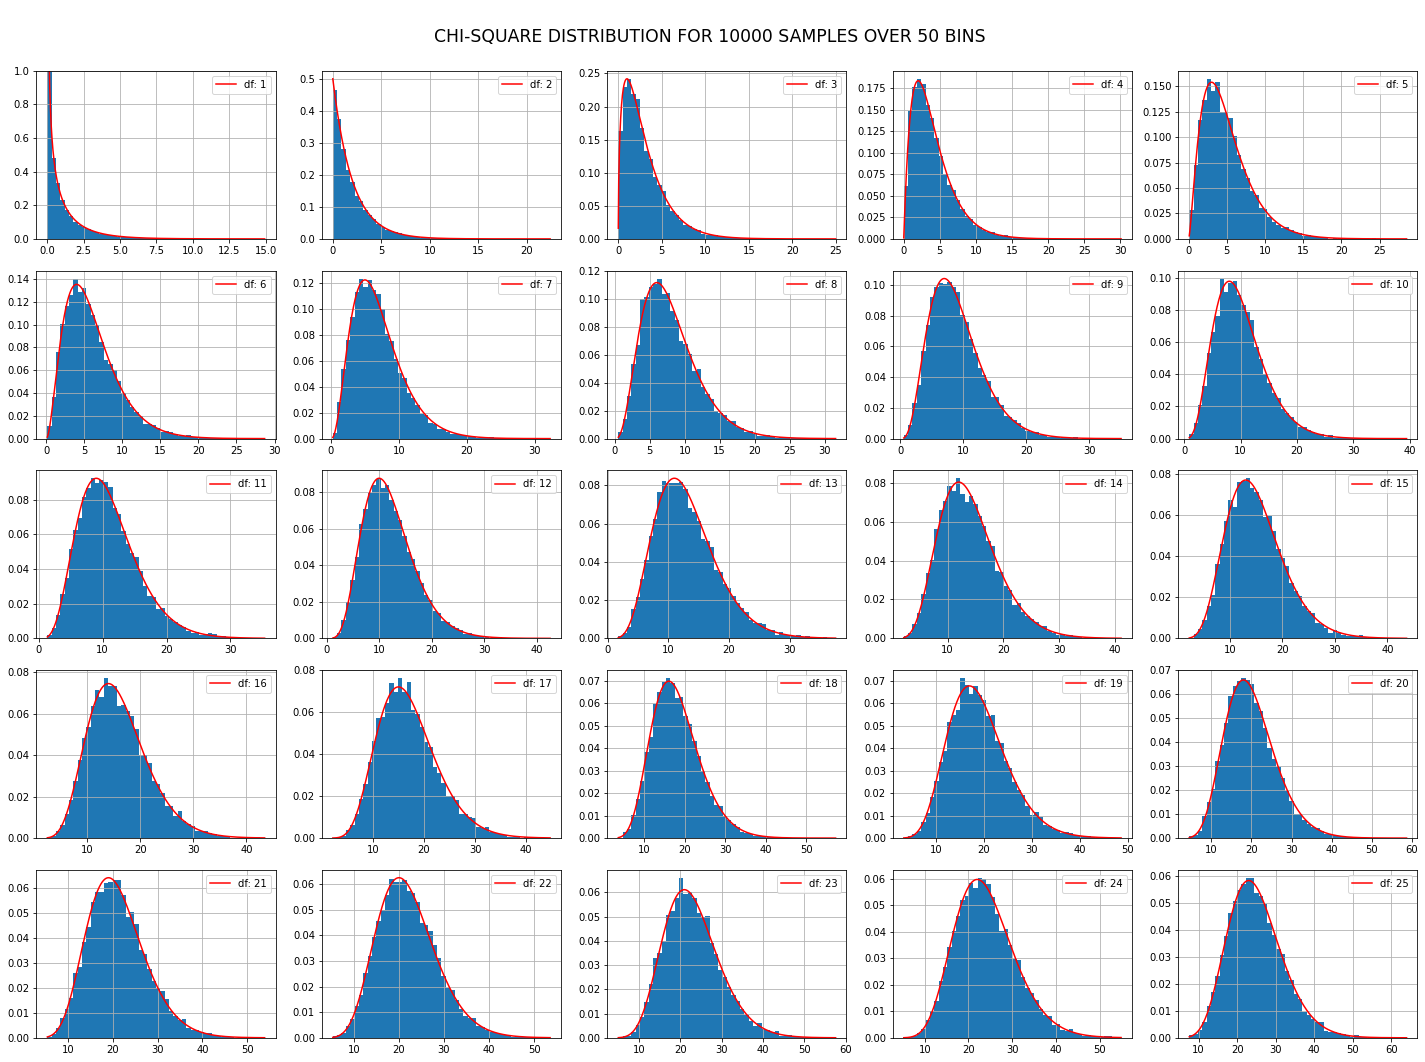

In [3]:
num = 10000
bins = 50
nw = 20 # figure width
nh = 15 # figure height
nr = 5  # number of rows    in plot
nc = 5  # number of columns in plot
rows = list(range(nr))
cols = list(range(nc))
vals = [(r, c) for r in rows for c in cols]
nn   = np.array(range(len(rows)*len(cols))) + 1
fig, ax = plt.subplots(len(rows), len(cols), figsize=(nw, nh))
for (r,c), n in zip(vals, nn):
    out = []
    for j in range(num):
        dd = np.random.normal(loc=0, scale=1.0, size=n)
        out.append(np.sum(dd*dd)) # form sum of squares of n normal RVs
    out = np.array(out)
    ax[r, c].hist(out, bins=bins, density=True)
    x = np.linspace(out.min(), out.max(), 1000)
    ax[r, c].plot(x, chi2.pdf(x, n), 'r', label='df: {}'.format(n))
    if n == 1: ax[r, c].set_ylim(0.0, 1.0)
    ax[r, c].legend()
    ax[r, c].grid()
fig.suptitle('\nCHI-SQUARE DISTRIBUTION FOR {} SAMPLES OVER {} BINS\n'.format(num, bins),
            fontsize='xx-large')
plt.tight_layout()
plt.show()

## CREATE A CHI-SQUARE TABLE (AGREES WITH SCHAUM'S 'STATISTICS' P.345)

In [338]:
def create_chi_square_table(rows=None, cols=None):
    '''
    Match chi-square table in Schaum's 'Statistics' p.345
    Verified with spot checks 12/7/22
    rows: list of desired degrees of freedom (default is Schaum's values)
    cols: list of desired percentile values (default is Schaum's values)
          eg, a percentile value of 0.95 returns the chi-sqare
           value that has 95% of the area to its LEFT; subsequently this
           same value represents 5% of the area to its RIGHT
    output: double dictionary indexed as follows:
            [degrees_of_freedom][percentile_value]: 
            eg, out[5][.95] would return 11.070497693516351
    '''
    default_rows = list(range(1, 101))
    default_cols = [.995, .99, .975, .95, .90, .75, .50, .25, .10, .05, .025, .01, .005]
    rows = rows if rows else default_rows
    cols = cols if cols else default_cols
    out = defaultdict()
    for df in rows:
        tmp = defaultdict()
        for percent in cols:
            tmp[percent] = chi2.ppf(percent, df)
        out[df] = tmp
    return out

In [340]:
tabl = create_chi_square_table()
tabl[5][.95], tabl[19][.5] # random checks

(11.070497693516351, 18.337652896756474)

## TEST CHI-SQUARE STATISTIC FOR A NULL HYPOTHESIS

In [414]:
# null hypothesis: fair die
# true die: fair
n     = 6 # number of sides of die
probs_fair   = np.array([1/n] * n)  # fair die probabilities
probs_loaded = np.array([1/8, 1/8, 1/8, 1/8, 1/8, 3/8])  # loaded die
num   = 40 # number of throws per trial
nexp  = 10000000  # number of trials
bins  = 50   # for histogram
cutoff = 0.05  # usual chi-square acceptance/rejection threshold

In [417]:
# generate the number of times each die face comes up using the multinomial probability
probs = probs_fair
out = np.random.multinomial(num, probs, size=nexp)
null = num * probs_fair  # null hypothesis fair die, expected number of each face
# form chi-square statistic
stat = np.sum((out - null)**2 / null, axis=1)

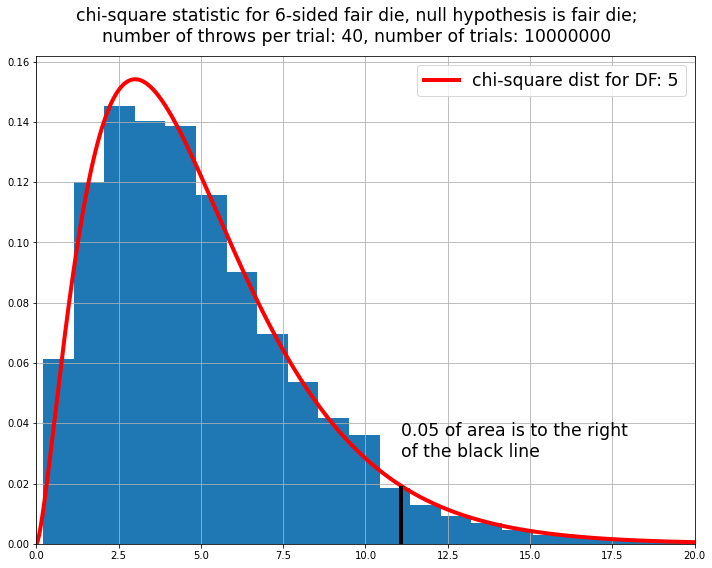

In [418]:
xmax = 20
df   = n - 1 # degrees of freedom for chi-square
chi_value = tabl[df][1 - cutoff]
prob_at_chi_value = chi2.pdf(chi_value, df=df)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
aa, bb, __ = ax.hist(stat, bins=50, density=True)
x = np.linspace(0, xmax, 1000)
ax.plot(x, chi2.pdf(x, df), 'r', linewidth=4, 
        label='chi-square dist for DF: {}'.format(df))
ax.set_xlim(0, xmax)
ax.vlines(chi_value, color='k', linewidth=4, 
          ymin=0, ymax=prob_at_chi_value)
ax.legend(fontsize='xx-large')
txt = '{} of area is to the right\nof the black line'.format(cutoff)
ax.text(chi_value, 1.5*prob_at_chi_value, txt, fontsize='xx-large')
ax.grid()
txt =  'chi-square statistic for {}-sided fair die, '.format(n)
txt += 'null hypothesis is fair die;'
txt += '\nnumber of throws per trial: {}, number of trials: {}'\
       .format(num, nexp)
fig.suptitle(txt, fontsize='xx-large')
fig.tight_layout()
plt.show()
# verify histogram is normalized: should be 1.0
#print(np.sum(aa*np.diff(bb)))

In [401]:
[[1/7]*5, 2/7]

[[0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 0.2857142857142857]

In [403]:
dd = [1,2,3]

In [405]:
dd.extend([4])
dd

[1, 2, 3, 4]

In [ ]:
probs = np.array([1/7]*5, 2/7)